In [170]:
import sys
import pickle
sys.path.append("/Volumes/UsersHD/MovedUsers/jeremyadams/Development/Personal/School/C753 - Machine Learning/ud120-projects/tools/")
sys.path.append('/Volumes/UsersHD/MovedUsers/jeremyadams/Development/Personal/School/C753 - Machine Learning/ud120-projects/choose_your_own')
sys.path.append('/Volumes/UsersHD/MovedUsers/jeremyadams/Development/Personal/School/C753 - Machine Learning/ud120-projects/datasets_questions')

import os
os.chdir('/Volumes/UsersHD/MovedUsers/jeremyadams/Development/Personal/School/C753 - Machine Learning/ud120-projects/evaluation')

from feature_format import featureFormat, targetFeatureSplit
# from tester import dump_classifier_and_data
import pprint
pp = pprint.PrettyPrinter(indent = 4)

from time import time

In [234]:
### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
features_list = ['poi','salary'] # You will need to use more features
financial_features = ['salary', 'deferral_payments', 'total_payments', 'loan_advances', 
        'bonus', 'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses', 
        'exercised_stock_options', 'other', 'long_term_incentive', 'restricted_stock', 'director_fees'] 
        # (all units are in US dollars)
email_features = ['to_messages', 'email_address', 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi']

total_features = ['poi'] + financial_features + email_features
original_total_features = ['poi'] + financial_features + email_features
### Load the dictionary containing the dataset
# with open("final_project_dataset.pkl", "r") as data_file:
#     data_dict = pickle.load(data_file)
data_dict = pickle.load(open("/Volumes/UsersHD/MovedUsers/jeremyadams/Development/Personal/School/C753 - Machine Learning/ud120-projects/final_project/final_project_dataset.pkl", "r") )



In [70]:
# Print total number of data points
print 'Total Number of data points: ', len(data_dict)


Total Number of data points:  146


In [71]:

# find features with missing values
# print total_features
features_with_missing_values = {}
for key in total_features:
    features_with_missing_values[key] = 0

# find number of poi
poi_list = []
for employee_key in data_dict:
    # if employee is poi then insert into poi list
    if (data_dict[employee_key]['poi'] == True):
        poi_list.append(data_dict[employee_key])
        print "Person of Interest is: ", employee_key
        # print data_dict[employee_key].keys()
    # increment missing features key if NaN or blank
    for feature in data_dict[employee_key]:
        if data_dict[employee_key][feature] == 'NaN' or feature not in features_with_missing_values:
            features_with_missing_values[feature] += 1
#             data_dict[employee_key][feature] = 0

Person of Interest is:  HANNON KEVIN P
Person of Interest is:  COLWELL WESLEY
Person of Interest is:  RIEKER PAULA H
Person of Interest is:  KOPPER MICHAEL J
Person of Interest is:  SHELBY REX
Person of Interest is:  DELAINEY DAVID W
Person of Interest is:  LAY KENNETH L
Person of Interest is:  BOWEN JR RAYMOND M
Person of Interest is:  BELDEN TIMOTHY N
Person of Interest is:  FASTOW ANDREW S
Person of Interest is:  CALGER CHRISTOPHER F
Person of Interest is:  RICE KENNETH D
Person of Interest is:  SKILLING JEFFREY K
Person of Interest is:  YEAGER F SCOTT
Person of Interest is:  HIRKO JOSEPH
Person of Interest is:  KOENIG MARK E
Person of Interest is:  CAUSEY RICHARD A
Person of Interest is:  GLISAN JR BEN F


In [227]:

# print number of poi
print "Number of POI: ", len(poi_list)
# print number of non poi
print "Number of Non-POI: ", len(data_dict) - len(poi_list)

# print total number of features
print "Total Number of features: ", len(total_features)

# print missing value count of features
print "Missing feature count"
pp.pprint(features_with_missing_values)

Number of POI:  18
Number of Non-POI:  127
Total Number of features:  22
Missing feature count
{   'bonus': 64,
    'deferral_payments': 107,
    'deferred_income': 97,
    'director_fees': 129,
    'email_address': 35,
    'exercised_stock_options': 44,
    'expenses': 51,
    'from_messages': 60,
    'from_poi_to_this_person': 60,
    'from_this_person_to_poi': 60,
    'loan_advances': 142,
    'long_term_incentive': 80,
    'other': 53,
    'poi': 0,
    'restricted_stock': 36,
    'restricted_stock_deferred': 128,
    'salary': 51,
    'shared_receipt_with_poi': 60,
    'to_messages': 60,
    'total_payments': 21,
    'total_stock_value': 20}


## Task 2

In [62]:
def show_scatter(data, x, y):
    # import matplot lib and show inline if possible
    import matplotlib.pyplot as plot
    % matplotlib inline
    
    # format features to get nice data to plot
    data_formatted = featureFormat(data, [x, y], sort_keys=True)
    
    # loop through points and plot as scatter
    for point in data_formatted:
        x_data = point[0]
        y_data = point[1]
        plot.scatter(x_data, y_data)
        
    # show labels
    plot.xlabel(x)
    plot.ylabel(y)
    plot.show()

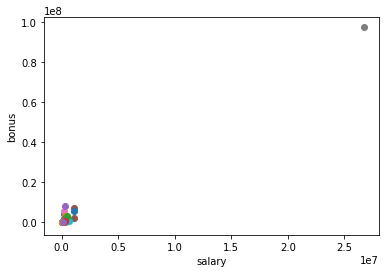

In [73]:

### Task 2: Remove outliers
# There was a lesson showing outliers with graph, put here
# enron_outliers.py

show_scatter(data_dict, "salary", "bonus")

In [84]:
def show_possible_outlier(data, feature):
    largest_amount = 0
    # loop through keys and find largest amount and not NaN
    for key in data:
        if data[key][feature] != 'NaN':
            if data[key][feature] > largest_amount:
                largest_amount = data_dict[key][feature] 
                largest_amount_key = key
    # print largest amount
    print "Possible Outlier: "
    print largest_amount_key
    print largest_amount

In [85]:
show_possible_outlier(data_dict, "salary")
show_possible_outlier(data_dict, "bonus")

Possible Outlier: 
TOTAL
26704229
Possible Outlier: 
TOTAL
97343619


In [86]:
data_dict.pop("TOTAL", 0)
show_possible_outlier(data_dict, "salary")
show_possible_outlier(data_dict, "bonus")

Possible Outlier: 
SKILLING JEFFREY K
1111258
Possible Outlier: 
LAVORATO JOHN J
8000000


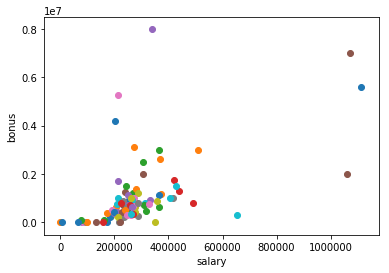

In [80]:
show_scatter(data_dict, "salary", "bonus")

## Task 3

In [87]:
### Task 3: Create new feature(s)
# There was a lesson that had messages from and to poi

### Store to my_dataset for easy export below.
my_dataset = data_dict

In [96]:
# email_features = ['to_messages', 'email_address', 'from_poi_to_this_person', 
#                  'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi']

# loop through employees and calculate fraction to/from poi
for employee in my_dataset:
    # calculate the fraction of emails from poi
    my_dataset[employee]["fraction_from_poi"] = 0.
    # divide from_poi_to_this_person by to_messages
    if my_dataset[employee]["from_poi_to_this_person"] != 'NaN' and my_dataset[employee]["to_messages"]!='NaN' and my_dataset[employee]["to_messages"] != 0:
        my_dataset[employee]["fraction_from_poi"] = my_dataset[employee]["from_poi_to_this_person"] / float(my_dataset[employee]["to_messages"])
    
    # calculate the fraction of emails to poi 
    my_dataset[employee]["fraction_to_poi"] = 0.
    # divide from_this_person_to_poi and from_messages
    if my_dataset[employee]["from_this_person_to_poi"] != 'NaN' and my_dataset[employee]["from_messages"]!='NaN' and my_dataset[employee]["from_messages"] != 0:
        my_dataset[employee]["fraction_to_poi"] = my_dataset[employee]["from_this_person_to_poi"] / float(my_dataset[employee]["from_messages"])
#     print employee
#     print my_dataset[employee]

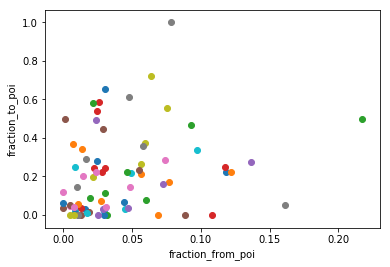

In [97]:
# plot scatter of new features
show_scatter(data_dict, "fraction_from_poi", "fraction_to_poi")

In [104]:
# Create new feature list for selecting best feature
new_feature_list = total_features
new_feature_list += ["fraction_from_poi", "fraction_to_poi"]

# print new feature list
print new_feature_list

# need to remove email from new_feature_list b/c of conversion to float error
new_feature_list.remove('email_address')
original_total_features.remove('email_address')

['poi', 'salary', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses', 'exercised_stock_options', 'other', 'long_term_incentive', 'restricted_stock', 'director_fees', 'to_messages', 'email_address', 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi', 'fraction_from_poi', 'fraction_to_poi']


In [161]:
### Extract features and labels from dataset for local testing
# featureFormat removes features with all zeros and converts NaNs to 0
data = featureFormat(my_dataset, new_feature_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

# Pick out best feature using SelectKBest 
"""
params for score_func
f_classif - ANOVA F-value between label/feature for classification tasks.
mutual_info_classif - Mutual information for a discrete target.
chi2 - Chi-squared stats of non-negative features for classification tasks.
f_regression - F-value between label/feature for regression tasks.
mutual_info_regression - Mutual information for a continuous target.
SelectPercentile - Select features based on percentile of the highest scores.
SelectFpr - Select features based on a false positive rate test.
SelectFdr - Select features based on an estimated false discovery rate.
SelectFwe - Select features based on family-wise error rate.
GenericUnivariateSelect - Univariate feature selector with configurable mode.
"""
from sklearn.feature_selection import SelectKBest, f_classif
# Select features using KBest
feature_select = SelectKBest(f_classif, k=10)
# Train using features from targetFeatureSplit function
feature_select.fit(features, labels)


SelectKBest(k=10, score_func=<function f_classif at 0x1a1ab92488>)

In [162]:
# print out scores to get a preview
print feature_select.scores_

# Create function to choose the 2nd element for sorting later
def choose_2nd_element(element):
    return element[1]

[18.57570327  0.21705893  8.86672154  7.2427304  21.06000171  0.06498431
 11.59554766 24.46765405  6.23420114 25.09754153  4.20497086 10.07245453
  9.34670079  2.10765594  1.69882435  5.34494152  0.1641645   2.42650813
  8.74648553  3.21076192 16.64170707]


In [168]:
# map features to scores, making sure to skip the first element which is poi
scores = zip(new_feature_list[1:], feature_select.scores_)
# Sort the scores using 2nd element which is the value, 
# sort in reverse to get highest values first
scores = sorted(scores, key=choose_2nd_element, reverse = True)
# print out scores
pp.pprint(scores)

[   ('exercised_stock_options', 25.09754152873549),
    ('total_stock_value', 24.4676540475264),
    ('bonus', 21.06000170753657),
    ('salary', 18.575703268041785),
    ('fraction_to_poi', 16.64170707046899),
    ('deferred_income', 11.5955476597306),
    ('long_term_incentive', 10.072454529369441),
    ('restricted_stock', 9.346700791051488),
    ('total_payments', 8.866721537107772),
    ('shared_receipt_with_poi', 8.74648553212908),
    ('loan_advances', 7.242730396536018),
    ('expenses', 6.23420114050674),
    ('from_poi_to_this_person', 5.344941523147337),
    ('other', 4.204970858301416),
    ('fraction_from_poi', 3.210761916966744),
    ('from_this_person_to_poi', 2.426508127242878),
    ('director_fees', 2.107655943276091),
    ('to_messages', 1.69882434858085),
    ('deferral_payments', 0.2170589303395084),
    ('from_messages', 0.16416449823428736),
    ('restricted_stock_deferred', 0.06498431172371151)]


In [165]:
# create kBest features by taking top 10 from scores list and add poi to begginning
kBest_features = ['poi'] + [(i[0]) for i in scores[0:10]]
print 'KBest', kBest_features

KBest ['poi', 'exercised_stock_options', 'total_stock_value', 'bonus', 'salary', 'fraction_to_poi', 'deferred_income', 'long_term_incentive', 'restricted_stock', 'total_payments', 'shared_receipt_with_poi']


## Task 4

In [ ]:
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.3, random_state=42)


In [308]:
### Task 4: Try a varity of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html

# lesson 15 for evaluate_poi_identifier.py
# split data to 30% for training
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score


def mean_scores(clf, classifier_name, features, labels, iters = 80):
    """ 
    """
    acc = []
    pre = []
    recall = []
    t0 = time()
    for i in range(iters):
        features_train, features_test, labels_train, labels_test = \
        train_test_split(features, labels, test_size = 0.3, random_state = i)
        clf.fit(features_train, labels_train)
        predicts = clf.predict(features_test)

        acc = acc + [accuracy_score(labels_test, predicts)] 
        pre = pre + [precision_score(labels_test, predicts)]
        recall = recall + [recall_score(labels_test, predicts)]
        
    print "{0} took a total time of {1}".format(classifier_name, round(time()-t0, 3), "s")
#     print "accuracy: {}".format(np.mean(acc))
#     print "precision: {}".format(np.mean(pre))
#     print "recall: {}".format(np.mean(recall))
    return np.mean(acc), np.mean(pre), np.mean(recall)
    
def algo_get_scores(clf, classifier_name, dataset, features, scale = True):
    from sklearn import preprocessing
    data = featureFormat(dataset, features, sort_keys = True)
    labels, features = targetFeatureSplit(data)
    if scale:
        scaler = preprocessing.MinMaxScaler()
        features = scaler.fit_transform(features)

    acc_score, prec_score, rec_score = mean_scores(clf, classifier_name, features, labels)
    # return values
    return acc_score, prec_score, rec_score

def algo_performance(clf, classifier_name, dataset, orig_features, new_features):
    
    orig_accuracy_score, orig_precision_score, orig_recall_score = \
        algo_get_scores(clf, classifier_name, dataset, orig_features, True)
    
    new_accuracy_score, new_precision_score, new_recall_score = \
        algo_get_scores(clf, classifier_name, dataset, new_features, True)
    
    return {classifier_name: [orig_accuracy_score, orig_precision_score, orig_recall_score, new_accuracy_score, new_precision_score, new_recall_score]}
#     # reset timeer for logging time to train
#     t0 = time()
#     # fit features and labels
#     clf.fit(features_train, labels_train)
#     # print training time
#     print "{0} training time: {1}".format(classifier_name, round(time()-t0, 3), "s")
#     # reset timeer for logging time to predict
#     t0 = time()
#     # make prediction
#     pred = clf.predict(features_test)
#     # print time to predict
#     print "{0} predicting time: {1}".format(classifier_name, round(time()-t0, 3), "s")
#     # Print Accuracy, Precision, and Recall stats
#     print "{0} accuracy: {1}".format(classifier_name, accuracy_score(labels_test, pred))
#     print "{0} precision: {1}".format(classifier_name, precision_score(labels_test, pred))
#     print "{0} recall: {1}".format(classifier_name, recall_score(labels_test, pred))
#     print ""
#     return {classifier_name: }


In [310]:
original_features = ['poi', 'exercised_stock_options', 'total_stock_value', 'bonus', 'salary', 'fraction_to_poi', 'deferred_income', 'long_term_incentive', 'restricted_stock', 'total_payments', 'shared_receipt_with_poi']
new_features = ['poi', 'exercised_stock_options', 'total_stock_value', 'bonus', 'salary', 'deferred_income', 'long_term_incentive', 'restricted_stock', 'total_payments', 'shared_receipt_with_poi']
print original_features
print new_features

classifier_dict = {}

naive = algo_performance(GaussianNB(), "Naive Bayes", my_dataset, original_features, new_features)
classifier_dict.update(naive)

dt_tree = algo_performance(tree.DecisionTreeClassifier(), "Decision Tree", my_dataset, original_features, new_features)
classifier_dict.update(dt_tree)

rnd_forest = algo_performance(RandomForestClassifier(), "Random Forest", my_dataset, original_features, new_features)
classifier_dict.update(rnd_forest)

ada_boost = algo_performance(AdaBoostClassifier(), "AdaBoost", my_dataset, original_features, new_features)
classifier_dict.update(ada_boost)

svm_svc = algo_performance(svm.SVC(), "Support Vector", my_dataset, original_features, new_features)
classifier_dict.update(svm_svc)

print(classifier_dict)


['poi', 'exercised_stock_options', 'total_stock_value', 'bonus', 'salary', 'fraction_to_poi', 'deferred_income', 'long_term_incentive', 'restricted_stock', 'total_payments', 'shared_receipt_with_poi']
['poi', 'exercised_stock_options', 'total_stock_value', 'bonus', 'salary', 'deferred_income', 'long_term_incentive', 'restricted_stock', 'total_payments', 'shared_receipt_with_poi']
Naive Bayes took a total time of 0.322
Naive Bayes took a total time of 0.322
Decision Tree took a total time of 0.286
Decision Tree took a total time of 0.282


/Volumes/UsersHD/MovedUsers/jeremyadams/anaconda2/lib/python2.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest took a total time of 3.618
Random Forest took a total time of 3.591
AdaBoost took a total time of 15.689
AdaBoost took a total time of 15.601
Support Vector took a total time of 0.318
Support Vector took a total time of 0.308
{'Support Vector': [0.875284090909091, 0.0, 0.0, 0.875284090909091, 0.0, 0.0], 'Naive Bayes': [0.846590909090909, 0.39506583694083697, 0.3348065476190476, 0.8494318181818181, 0.4011507936507936, 0.33782738095238096], 'Random Forest': [0.8696022727272726, 0.38273809523809527, 0.16802579365079362, 0.8630681818181818, 0.3441666666666667, 0.15552579365079364], 'AdaBoost': [0.8375, 0.3183382936507936, 0.23898313492063492, 0.8380681818181817, 0.2827209249084249, 0.21910218253968256], 'Decision Tree': [0.828125, 0.32359397546897545, 0.31741071428571427, 0.805965909090909, 0.2571411574536574, 0.27485119047619044]}


In [311]:
import pandas as pd
from pytablewriter import MarkdownTableWriter

new_pd = pd.DataFrame.from_dict(classifier_dict, orient='index', columns=['original features accuracy', 'original features precision', 'original features recall', 
                                                               'new features accuracy', 'new features precision', 'new features recall'])

writer = MarkdownTableWriter()
writer.table_name = "Mean Accuracy, Precision and Recall for Features"
writer.from_dataframe(
    new_pd,
    add_index_column=True
)
writer.write_table()

# Mean Accuracy, Precision and Recall for Features
|              |original features accuracy|original features precision|original features recall|new features accuracy|new features precision|new features recall|
|--------------|-------------------------:|--------------------------:|-----------------------:|--------------------:|---------------------:|------------------:|
|Support Vector|                    0.8753|                     0.0000|                  0.0000|               0.8753|                0.0000|             0.0000|
|Naive Bayes   |                    0.8466|                     0.3951|                  0.3348|               0.8494|                0.4012|             0.3378|
|Random Forest |                    0.8696|                     0.3827|                  0.1680|               0.8631|                0.3442|             0.1555|
|AdaBoost      |                    0.8375|                     0.3183|                  0.2390|               0.8381|                0.282

In [314]:
def fine_tune_algo(clf, classifier_name, params, dataset, feature_list):
    from sklearn.model_selection import train_test_split, GridSearchCV
    from sklearn import preprocessing
    data = featureFormat(dataset, feature_list, sort_keys = True)
    labels, features = targetFeatureSplit(data)
    scaler = preprocessing.MinMaxScaler()
    features = scaler.fit_transform(features)
    features_train, features_test, labels_train, labels_test = \
        train_test_split(features, labels, test_size=0.3, random_state=42)

    # run GridSearchCV with estimator set to chosen classifier
    clf_tune = GridSearchCV(estimator = clf, param_grid = params, cv=5, iid= True).fit(features, labels)
    
    # print out best Estimator params
    print "{0}: Best Estimator params: {1}".format(classifier_name, clf_tune.best_estimator_)
    return clf_tune.best_estimator_

In [316]:
dt_params = {
    'criterion':('gini', 'entropy'),
    'min_samples_split' : range(2,50),
    'splitter':('best','random')
}
dt_best_params = fine_tune_algo(tree.DecisionTreeClassifier(), "Decision Tree", dt_params, my_dataset, new_features)
print dt_best_params
dt_tree = algo_performance(dt_best_params, "Decision Tree", my_dataset, original_features, new_features)


Decision Tree: Best Estimator params: DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=28,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='random')
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=28,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='random')
Decision Tree took a total time of 0.271
Decision Tree took a total time of 0.267


In [317]:
# dt_tree = algo_performance(tree.DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
#             max_features=None, max_leaf_nodes=None,
#             min_impurity_decrease=0.0, min_impurity_split=None,
#             min_samples_leaf=1, min_samples_split=24,
#             min_weight_fraction_leaf=0.0, presort=False, random_state=None,
#             splitter='random'), "Decision Tree", my_dataset, original_features, new_features)
print dt_tree

{'Decision Tree': [0.8610795454545455, 0.30645833333333333, 0.11243551587301588, 0.8625, 0.31989087301587305, 0.15762896825396824]}


In [214]:
# Provided to give you a starting point. Try a variety of classifiers.
# Naive Bayes from nb_author_id.py
from sklearn.naive_bayes import GaussianNB
# set classifier
clf_naive = GaussianNB(priors=None, var_smoothing=1e-09)
# reset timeer for logging time to train
t0 = time()
# fit features and labels
clf_naive.fit(features_train, labels_train)
# print training time
print "Naive Bayes training time:", round(time()-t0, 3), "s"
# reset timeer for logging time to predict
t0 = time()
# make prediction
pred_naive = clf_naive.predict(features_test)
# print time to predict
print "Naive Bayes predicting time:", round(time()-t0, 3), "s"
# Print Accuracy, Precision, and Recall stats
print "Naive Bayes accuracy: ", accuracy_score(labels_test, pred_naive)
print "Naive Bayes precision: ", precision_score(labels_test, pred_naive)
print "Naive Bayes recall: ", recall_score(labels_test, pred_naive)

Naive Bayes training time: 0.002 s
Naive Bayes predicting time: 0.002 s
Naive Bayes accuracy:  0.8863636363636364
Naive Bayes precision:  0.5
Naive Bayes recall:  0.4


In [201]:
# Decision Tree from dt_author_id.py
from sklearn import tree
clf_tree = tree.DecisionTreeClassifier(min_samples_split = 50)
t0 = time()
clf_tree.fit(features_train, labels_train)
print "Decision Tree training time:", round(time()-t0, 3), "s"
t0 = time()
pred_tree = clf_tree.predict(features_test)
print "Decision Tree predicting time:", round(time()-t0, 3), "s"
print "Decision Tree accuracty: ", accuracy_score(labels_test, pred_tree)
print "Decision Tree precision: ", precision_score(labels_test, pred_tree)
print "Decision Tree recall: ", recall_score(labels_test, pred_tree)

Decision Tree training time: 0.003 s
Decision Tree predicting time: 0.001 s
Decision Tree accuracty:  0.8409090909090909
Decision Tree precision:  0.3333333333333333
Decision Tree recall:  0.4


In [205]:
# Random Forest Classifier from choose_your_own
from sklearn.ensemble import RandomForestClassifier
clf_random_forest = RandomForestClassifier(n_estimators=10, min_samples_split=2)
t0 = time()
clf_random_forest.fit(features_train, labels_train)
print "Random Forest time:", round(time()-t0, 3), "s"
t0 = time()
pred_random_forest = clf_random_forest.predict(features_test)
print "Random Forest predicting time:", round(time()-t0, 3), "s"
print "Random Forest accuracty: ", accuracy_score(labels_test, pred_random_forest)
print "Random Forest precision: ", precision_score(labels_test, pred_random_forest)
print "Random Forest recall: ", recall_score(labels_test, pred_random_forest)

Random Forest time: 0.06 s
Random Forest predicting time: 0.003 s
Random Forest accuracty:  0.9090909090909091
Random Forest precision:  0.6666666666666666
Random Forest recall:  0.4


In [190]:
# AdaBoost Classifier from choose_your_own
from sklearn.ensemble import AdaBoostClassifier
clf_adaboost = AdaBoostClassifier(base_estimator=None, n_estimators=100, learning_rate=1.0, algorithm='SAMME.R', random_state=None)
t0 = time()
clf_adaboost.fit(features_train, labels_train)
print "AdaBoost Forest time:", round(time()-t0, 3), "s"
t0 = time()
pred_adaboost = clf_adaboost.predict(features_test)
print "AdaBoost predicting time:", round(time()-t0, 3), "s"
print "AdaBoost accuracty: ", accuracy_score(labels_test, pred_adaboost)
print "AdaBoost precision: ", precision_score(labels_test, pred_adaboost)
print "AdaBoost recall: ", recall_score(labels_test, pred_adaboost)


AdaBoost Forest time: 0.376 s
AdaBoost predicting time: 0.02 s
AdaBoost accuracty:  0.8181818181818182
AdaBoost precision:  0.2
AdaBoost recall:  0.2


In [203]:
# Support Vector Classification from 
from sklearn import svm
clf_logistic_regression = svm.SVC(gamma='auto')
t0 = time()
clf_logistic_regression.fit(features_train, labels_train)
print "Support Vector time:", round(time()-t0, 3), "s"
t0 = time()
pred_logistic_regression = clf_logistic_regression.predict(features_test)
print "Support Vector time:", round(time()-t0, 3), "s"
print "Support Vector accuracty: ", accuracy_score(labels_test, pred_logistic_regression)
print "Support Vector precision: ", precision_score(labels_test, pred_logistic_regression)
print "Support Vector recall: ", recall_score(labels_test, pred_logistic_regression)

Support Vector time: 0.004 s
Support Vector time: 0.002 s
Support Vector accuracty:  0.8863636363636364
Support Vector precision:  0.0
Support Vector recall:  0.0


In [206]:
print new_feature_list

['poi', 'salary', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses', 'exercised_stock_options', 'other', 'long_term_incentive', 'restricted_stock', 'director_fees', 'to_messages', 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi', 'fraction_from_poi', 'fraction_to_poi']


In [207]:
print kBest_features

['poi', 'exercised_stock_options', 'total_stock_value', 'bonus', 'salary', 'fraction_to_poi', 'deferred_income', 'long_term_incentive', 'restricted_stock', 'total_payments', 'shared_receipt_with_poi']


In [208]:
print features_list

['poi', 'salary']


In [225]:
## Train classifiers

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

from sklearn.model_selection import learning_curve, GridSearchCV

params = {
    'criterion': ('gini', 'entropy'),
    'splitter': ('best', 'random'),
    'max_depth': range(1,25),
    'min_samples_split':range(2,10),
    'random_state': [42]
}
clf_tune = GridSearchCV(estimator = GaussianNB(), param_grid = {}, cv=5, iid= True).fit(features, labels)
print "Best Estiamtor: ", clf_tune.best_estimator_


Best Estiamtor:  GaussianNB(priors=None, var_smoothing=1e-09)


In [222]:
print range(1,25)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


<code>GaussianNB(priors=None, var_smoothing=1e-09)
Accuracy: 0.84200       Precision: 0.38622      Recall: 0.31400 F1: 0.34639     F2: 0.32620
Total predictions: 15000        True positives:  628    False positives:  998   False negatives: 1372   
True negatives: 12002
</code>